## 사용 패키지

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.ensemble import RandomForestRegressor

from pycaret.regression import *

## 데이터 로드

In [5]:
train = pd.read_csv('C:/Users/user/Documents/12rAIDacon/train.csv')
test = pd.read_csv('C:/Users/user/Documents/12rAIDacon/test.csv')
submission = pd.read_csv('C:/Users/user/Documents/12rAIDacon/sample_submission.csv')

In [135]:
# temp.columns = ['일자','기온','풍속','체감기온']

In [136]:
# train = pd.merge(train, temp)
# test = pd.merge(test, temp)

In [137]:
# rain.columns = ['일자', '강수량']
# rain.fillna(0, inplace=True)

In [138]:
# train = pd.merge(train,rain)
# test = pd.merge(test, rain)

In [139]:
# plt.figure(figsize=(12,6))
# sns.barplot(train['일'], train['강수량'])

In [140]:
# plt.figure(figsize=(12,6))
# sns.regplot(train2['강수량'] , train2['중식계'])

In [141]:
# expr = train['강수량'] > 80

In [142]:
# train2 = train[expr]

In [143]:
# train2

In [3]:
train.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


## 데이터

## 요일을 숫자로 매핑

In [145]:
#train['요일'] = train['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})
#test['요일'] = test['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})

## `요일 랭크지정 방식.`
## 석식에만 적용! 석식 수요일이 자기개발의 날 때문에 적어서.

In [6]:
weekdayrankfordinner = {
    '월' : 1,
    '화' : 2,
    '수' : 5,
    '목' : 3,
    '금' : 4
} 

train['요일(석식)'] = train['요일'].map(weekdayrankfordinner)
test['요일(석식)'] = test['요일'].map(weekdayrankfordinner)

## `월, 일을 숫자형으로 변환`

In [7]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

print(train['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.isocalendar().week
train['요일'] = train['일자'].dt.weekday


test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.isocalendar().week
test['요일'] = test['일자'].dt.weekday

train['주'] = train['주'].astype('int') # '주'의 타입이 Uint로 사용이 안되어 int로 변경해줌.
test['주'] = test['주'].astype('int')

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]


## `0712 비율변수 추가`

In [5]:
train['휴가비율'] = train['본사휴가자수']/train['본사정원수']
train['출장비율'] = train['본사출장자수']/train['본사정원수']
train['재택비율'] = train['현본사소속재택근무자수']/train['본사정원수']


test['휴가비율'] = test['본사휴가자수']/test['본사정원수']
test['출장비율'] = test['본사출장자수']/test['본사정원수']
test['재택비율'] = test['현본사소속재택근무자수']/test['본사정원수']

<AxesSubplot:xlabel='월', ylabel='중식계'>

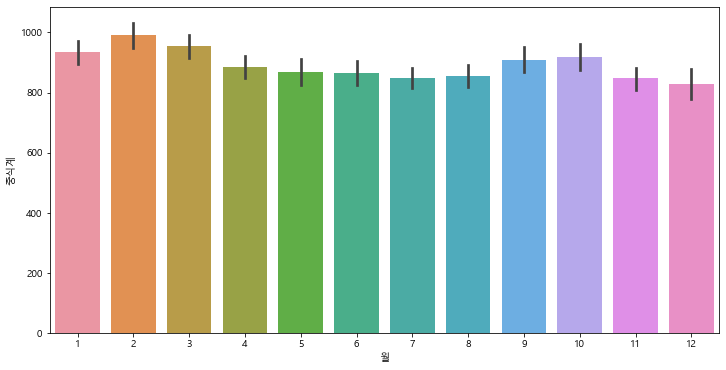

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(train['월'], train['중식계'])

<AxesSubplot:xlabel='월', ylabel='석식계'>

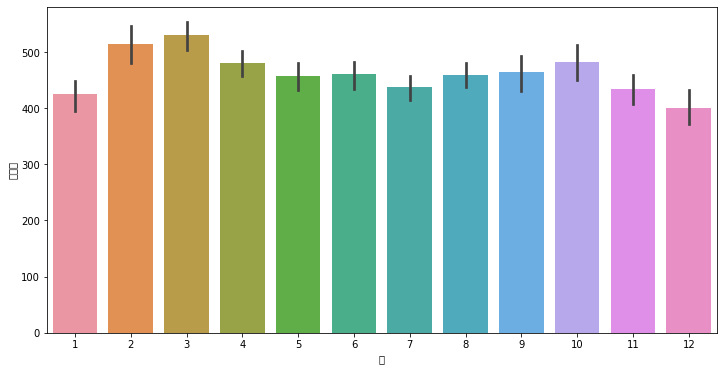

In [150]:
plt.figure(figsize=(12,6))
sns.barplot(train['월'], train['석식계'])

In [8]:
sampletrain = train.loc[:,('주','중식계','석식계')]
sampletrain.groupby(['주']).mean().iloc[:,0].sort_values()

주
52     672.571429
31     761.920000
33     793.000000
30     807.360000
32     822.200000
18     823.500000
46     824.040000
45     826.080000
47     826.120000
21     834.750000
44     847.080000
23     849.476190
51     857.320000
43     859.120000
28     859.600000
29     862.280000
42     863.720000
24     865.458333
17     873.400000
22     879.000000
26     879.700000
25     881.200000
27     881.217391
20     884.440000
15     889.750000
14     892.160000
16     893.375000
50     894.760000
19     897.095238
1      898.727273
3      910.960000
39     911.100000
36     911.520000
48     912.560000
2      913.680000
4      915.250000
37     916.250000
34     918.750000
13     921.400000
49     927.720000
35     933.760000
38     933.760000
12     954.360000
11     955.560000
6      966.157895
5      978.695652
9      983.190476
8      983.200000
10     984.000000
41     999.761905
7     1017.173913
40    1060.125000
Name: 중식계, dtype: float64

In [9]:
sampletrain.groupby(['주']).mean().iloc[:,1].sort_values()

주
52    216.952381
1     392.181818
31    399.000000
4     404.650000
48    404.840000
30    415.160000
26    417.550000
51    419.600000
43    422.800000
44    423.280000
46    426.720000
2     426.880000
17    430.520000
22    433.680000
33    434.285714
39    434.550000
29    434.800000
3     435.200000
32    437.640000
45    440.400000
18    441.937500
5     442.826087
47    443.480000
35    450.200000
23    457.333333
28    457.600000
37    458.850000
21    459.458333
19    464.523810
27    467.086957
24    470.083333
42    476.960000
9     479.428571
20    484.640000
38    484.680000
50    485.720000
25    490.350000
13    492.720000
16    494.666667
49    494.960000
12    505.040000
36    505.400000
15    508.000000
14    511.120000
34    512.958333
6     517.684211
11    539.120000
8     540.520000
7     541.391304
41    558.333333
10    577.240000
40    611.500000
Name: 석식계, dtype: float64

In [10]:
sampletrain = train.loc[:,('월','중식계','석식계')]
sampletrain.groupby(['월']).mean()

,중식계,석식계
월,,
1,934.247525,424.564356
2,989.623656,514.860215
3,953.607477,530.700935
4,883.621359,480.825243
5,869.787879,458.131313
6,863.311111,460.355556
7,848.736364,437.300000
8,854.785047,459.485981
9,907.148936,463.617021


In [11]:
expr = (train['년']>=2020) & (train['월'] >=1) & (train['월']<=4 )

In [12]:
train[expr].mean()

요일                   1.969697
본사정원수             2916.272727
본사휴가자수             141.030303
본사출장자수             194.181818
본사시간외근무명령서승인건수     347.727273
현본사소속재택근무자수        180.494949
중식계                931.979798
석식계                459.676768
요일(석식)               2.959596
년                 2020.171717
월                    2.252525
일                   15.464646
주                    8.373737
dtype: float64

## `월 랭크지정 방식` 낮은게 12 큰게 1 요일 랭크와 동일

In [13]:
month1 = {
    1:3,
    2:1,
    3:2,
    4:6,
    5:7,
    6:8,
    7:10,
    8:9,
    9:5,
    10:4,
    11:11,
    12:12
}

month2 = {
    1:11,
    2:2,
    3:1,
    4:4,
    5:8,
    6:6,
    7:9,
    8:7,
    9:5,
    10:3,
    11:10,
    12:12
}
train['월(중식)'] = train['월'].map(month1)
test['월(중식)'] = test['월'].map(month1)

train['월(석식)'] = train['월'].map(month2)
test['월(석식)'] = test['월'].map(month2)

train['월(중식)'] = train['월(중식)'].astype('int') # float형이라 int로 변경
test['월(중식)'] = test['월(중식)'].astype('int')
train['월(석식)'] = train['월(석식)'].astype('int')
test['월(석식)'] = test['월(석식)'].astype('int')

## `주 랭크지정 방식`


In [14]:
#중식
week1 = {
    52	:	52	,
    31	:	51	,
    33	:	50	,
    30	:	49	,
    32	:	48	,
    18	:	47	,
    46	:	46	,
    45	:	45	,
    47	:	44	,
    21	:	43	,
    44	:	42	,
    23	:	41	,
    51	:	40	,
    43	:	39	,
    28	:	38	,
    29	:	37	,
    42	:	36	,
    24	:	35	,
    17	:	34	,
    22	:	33	,
    26	:	32	,
    25	:	31	,
    27	:	30	,
    20	:	29	,
    15	:	28	,
    14	:	27	,
    16	:	26	,
    50	:	25	,
    19	:	24	,
    1	:	23	,
    3	:	22	,
    39	:	21	,
    36	:	20	,
    48	:	19	,
    2	:	18	,
    4	:	17	,
    37	:	16	,
    34	:	15	,
    13	:	14	,
    49	:	13	,
    35	:	12	,
    38	:	11	,
    12	:	10	,
    11	:	9	,
    6	:	8	,
    5	:	7	,
    9	:	6	,
    8	:	5	,
    10	:	4	,
    41	:	3	,
    7	:	2	,
    40	:	1	
}

#석식 위부터 작은수임

week2 = {
    52	:	52	,
    1	:	51	,
    31	:	50	,
    4	:	49	,
    48	:	48	,
    30	:	47	,
    26	:	46	,
    51	:	45	,
    43	:	44	,
    44	:	43	,
    46	:	42	,
    2	:	41	,
    17	:	40	,
    22	:	39	,
    33	:	38	,
    39	:	37	,
    29	:	36	,
    3	:	35	,
    32	:	34	,
    45	:	33	,
    18	:	32	,
    5	:	31	,
    47	:	30	,
    35	:	29	,
    23	:	28	,
    28	:	27	,
    37	:	26	,
    21	:	25	,
    19	:	24	,
    27	:	23	,
    24	:	22	,
    42	:	21	,
    9	:	20	,
    20	:	19	,
    38	:	18	,
    50	:	17	,
    25	:	16	,
    13	:	15	,
    16	:	14	,
    49	:	13	,
    12	:	12	,
    36	:	11	,
    15	:	10	,
    14	:	9	,
    34	:	8	,
    6	:	7	,
    11	:	6	,
    8	:	5	,
    7	:	4	,
    41	:	3	,
    10	:	2	,
    40	:	1	
}

train['주(중식)'] = train['주'].map(week1)
test['주(중식)'] = test['주'].map(week1)

train['주(석식)'] = train['주'].map(week2)
test['주(석식)'] = test['주'].map(week2)

train['주(중식)'] = train['주(중식)'].astype('int') # float형이라 int로 변경
test['주(중식)'] = test['주(중식)'].astype('int')
train['주(석식)'] = train['주(석식)'].astype('int')
test['주(석식)'] = test['주(석식)'].astype('int')

## `연도 랭크지정 방식` 효과 X

In [15]:
# year1 = {
#     2021 : 1,
#     2016 : 3,
#     2017 : 2,
#     2018 : 4,
#     2020 : 5,
#     2019 : 6
# }


# year2 = {
#     2016 : 1,
#     2017 : 3,
#     2018 : 2,
#     2019 : 4,
#     2020 : 5,
#     2021 : 6
# }





# train['년(중식)'] = train['년'].map(year1)
# test['년(중식)'] = test['년'].map(year1)

# train['년(석식)'] = train['년'].map(year2)
# test['년(석식)'] = test['년'].map(year2)

# train['년(중식)'] = train['년(중식)'].astype('int') # float형이라 int로 변경
# test['년(중식)'] = test['년(중식)'].astype('int')
# train['년(석식)'] = train['년(석식)'].astype('int')
# test['년(석식)'] = test['년(석식)'].astype('int')

## `일 랭크지정방식 ` 효과 X 사용안함

## `식사가능자수`

In [16]:
train['식사가능자수'] = (train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'])
test['식사가능자수'] = (test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'])

In [160]:
#train['중식참여율'] = train['중식계'] / train['식사가능자수']
#train['석식참여율'] = train['석식계'] / train['식사가능자수']

#test['중식참여율'] = test['중식계'] / test['식사가능자수']
#test['석식참여율'] = test['석식계'] / test['식사가능자수']

In [17]:
train['식사가능자수']

0       2551.0
1       2551.0
2       2545.0
3       2497.0
4       2323.0
         ...  
1200    2517.0
1201    2540.0
1202    2425.0
1203    2549.0
1204    2552.0
Name: 식사가능자수, Length: 1205, dtype: float64

# `0708 공휴일 전후 추가 `

In [22]:
train['공휴일전후'] = 0
test['공휴일전후'] = 0

In [23]:
#(공휴일+-1) = 1, (공휴일+-2) = 2, (휴가시즌 =3)
train['공휴일전후'][3] = 2 
train['공휴일전후'][4] = 1 
train['공휴일전후'][11] = 3 
train['공휴일전후'][17] = 1
train['공휴일전후'][18] = 1
train['공휴일전후'][47] = 1
train['공휴일전후'][48] = 1
train['공휴일전후'][62] = 1
train['공휴일전후'][67] = 1
train['공휴일전후'][82] = 1
train['공휴일전후'][83] = 1 
train['공휴일전후'][120:130] =3 # 휴가시즌
train['공휴일전후'][131] = 1
train['공휴일전후'][132] = 1
train['공휴일전후'][133] = 2
train['공휴일전후'][151] = 2
train['공휴일전후'][152] = 1
train['공휴일전후'][153] = 1 # 추석연휴 후월
train['공휴일전후'][163] = 1
train['공휴일전후'][221] = 2
train['공휴일전후'][226] = 3 # 20161230
train['공휴일전후'][245] = 1
train['공휴일전후'][246] = 1
train['공휴일전후'][266] = 1
train['공휴일전후'][268] = 2
train['공휴일전후'][267] = 1
train['공휴일전후'][308] = 2
train['공휴일전후'][309] = 1
train['공휴일전후'][310] = 1
train['공휴일전후'][311] = 1 #대선
train['공휴일전후'][330] = 1
train['공휴일전후'][331] = 1
train['공휴일전후'][367:378] = 3 #2017 여름휴가
train['공휴일전후'][379] = 1
train['공휴일전후'][380] = 1
train['공휴일전후'][381] = 2
train['공휴일전후'][413] = 1
train['공휴일전후'][467] = 1
train['공휴일전후'][469] = 2
train['공휴일전후'][470] = 3 # 2017 마지막
train['공휴일전후'][502] = 1
train['공휴일전후'][501] = 2
train['공휴일전후'][510] = 1
train['공휴일전후'][511] = 1
train['공휴일전후'][552] = 1
train['공휴일전후'][555] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][566] = 1
train['공휴일전후'][575] = 1
train['공휴일전후'][576] = 1
train['공휴일전후'][579] = 1 #지방선거전후
train['공휴일전후'][580] = 1
train['공휴일전후'][611:621] = 3 #휴가
train['공휴일전후'][622] = 2
train['공휴일전후'][623] = 1
train['공휴일전후'][624] = 1
train['공휴일전후'][625] = 2
train['공휴일전후'][651] = 1
train['공휴일전후'][705] = 1
train['공휴일전후'][706] = 1
train['공휴일전후'][707] = 3 #연말휴가
train['공휴일전후'][708] = 2
train['공휴일전후'][709] = 1 # 20181231
train['공휴일전후'][733] = 1
train['공휴일전후'][734] = 2
train['공휴일전후'][748] = 1
train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 1
train['공휴일전후'][814] = 1
train['공휴일전후'][850:861] = 3
train['공휴일전후'][862] = 2
train['공휴일전후'][863] = 1
train['공휴일전후'][864] = 1
train['공휴일전후'][882] = 1
train['공휴일전후'][898] = 1
train['공휴일전후'][899] = 2
train['공휴일전후'][897] = 1
train['공휴일전후'][904] = 3 #여기부터 패턴 금요일마다 휴가자 증가
train['공휴일전후'][909] = 3
train['공휴일전후'][924] = 3
train['공휴일전후'][929] = 3
train['공휴일전후'][939] = 3
train['공휴일전후'][949] = 3 #연말휴가
train['공휴일전후'][950] = 2
train['공휴일전후'][951] = 1
train['공휴일전후'][952] = 1
train['공휴일전후'][953] = 2
train['공휴일전후'][954] = 2
train['공휴일전후'][955] = 1
train['공휴일전후'][956] = 1
train['공휴일전후'][957] = 2
train['공휴일전후'][971] = 1
train['공휴일전후'][970] = 2
train['공휴일전후'][995] = 2
train['공휴일전후'][1020] = 3 #2020년코로나 변수 고려? 
train['공휴일전후'][1025] = 3
train['공휴일전후'][1029] = 3
train['공휴일전후'][1028] = 1 #국회의원선거
train['공휴일전후'][1027] = 1
train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1061] = 1
train['공휴일전후'][1084:1097] = 3
train['공휴일전후'][1098] = 2
train['공휴일전후'][1099] = 1
train['공휴일전후'][1100:1104] = 3
train['공휴일전후'][1108] = 3
train['공휴일전후'][1129] = 1
train['공휴일전후'][1128] = 2
train['공휴일전후'][1133] = 1
train['공휴일전후'][1058] = 3
train['공휴일전후'][1063] = 3
train['공휴일전후'][1068] = 3
train['공휴일전후'][1073] = 3
train['공휴일전후'][1078] = 3
train['공휴일전후'][1083] = 3
train['공휴일전후'][1187] = 1
train['공휴일전후'][1186] = 2

test['공휴일전후'][2] = 2 
test['공휴일전후'][10] = 1
test['공휴일전후'][11] = 2
test['공휴일전후'][20] = 1 
test['공휴일전후'][21] = 1
test['공휴일전후'][29] = 3
test['공휴일전후'][34] = 3
test['공휴일전후'][39] = 3
test['공휴일전후'][44] = 3
test['공휴일전후'][49] = 3

In [24]:
# 원핫인코딩
train = pd.get_dummies(train, columns=['공휴일전후'])
test = pd.get_dummies(test, columns=['공휴일전후'])

In [168]:
test['공휴일전후_0'][20] =0
test['공휴일전후_1'][20] = 1

In [18]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,요일(석식),년,월,일,주,월(중식),월(석식),주(중식),주(석식),식사가능자수
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,1,2016,2,1,5,1,2,7,31,2551.0
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2016,2,2,5,1,2,7,31,2551.0
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,5,2016,2,3,5,1,2,7,31,2545.0
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,3,2016,2,4,5,1,2,7,31,2497.0
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,4,2016,2,5,5,1,2,7,31,2323.0


## Feature

In [169]:
#x_train = train[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
#y1_train = train['중식계']
#y2_train = train['석식계']

#x_test = test[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

In [197]:
x1_train = train[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수', '본사휴가자수', '주(중식)']] #중식계
x2_train = train[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','본사휴가자수','년','본사정원수']] #석식계

y1_train = train['중식계']
y2_train = train['석식계']

x1_test = test[['요일', '본사시간외근무명령서승인건수', '식사가능자수','월(중식)','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수', '본사휴가자수', '주(중식)']]
x2_test = test[['요일(석식)', '본사시간외근무명령서승인건수', '식사가능자수','월(석식)','공휴일전후_0','공휴일전후_1','공휴일전후_2','본사출장자수','본사휴가자수','년','본사정원수']]

## 점심과 저녁을 식수 인원을 예측할 2개 모델 생성

In [198]:
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

## 학습

In [192]:
# model1.fit(x1_train, y1_train) #중식계
# model2.fit(x2_train, y2_train) #석식계

## 추론

In [193]:
# pred1 = model1.predict(x1_test)
# pred2 = model2.predict(x2_test)

## 결과 제출

In [194]:
# submission['중식계'] = pred1
# submission['석식계'] = pred2

In [195]:
# submission.to_csv('baseline.csv', index=False)

# `Kfold 적용 버전`

In [196]:
# from sklearn.model_selection import KFold
# k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

In [197]:
# model1.fit(x1_train, y1_train) #중식계
# model2.fit(x2_train, y2_train) #석식계

In [198]:
# model1 = cat
# models1 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x1_train):
#     x1_t = x1_train.iloc[train_idx]
#     y1_t = y1_train.iloc[train_idx]
#     x1_val = x1_train.iloc[val_idx]
#     y1_val = y1_train.iloc[val_idx]
    
#      models1.append(model1.fit(x1_t, y1_t))#, eval_set = (x1_val, y1_val), early_stopping_rounds=100, verbose = 100))

# preds1 = []
# for model1 in models1:
#     preds1.append(model1.predict(x1_test))    


# model2 = cat
# models2 = [] # 교차검증을 위한 바구나 5개

# for train_idx, val_idx in k_fold.split(x2_train):
#     x2_t = x2_train.iloc[train_idx]
#     y2_t = y2_train.iloc[train_idx]
#     x2_val = x2_train.iloc[val_idx]
#     y2_val = y2_train.iloc[val_idx]
    
#     models2.append(model2.fit(x2_t, y2_t))#, eval_set = (x2_val, y2_val), early_stopping_rounds=100, verbose = 100))
    

# preds2 = []
# for model2 in models2:
#     preds2.append(model2.predict(x2_test))

In [199]:
# pred1 = np.mean(preds1, axis=0)
# pred2 = np.mean(preds2, axis=0)

In [200]:
# submission['중식계'] = pred1
# submission['석식계'] = pred2

In [201]:
# submission.to_csv('baseline0712.csv', index=False)

## `앙상블 모델 적용 버전`

In [29]:
# 메뉴
train_lunch = pd.concat([x1_train, train['중식계']], axis = 1) # concat cbind 역할
train_dinner = pd.concat([x2_train, train['석식계']], axis = 1)
test_lunch = pd.concat([x1_test], axis = 1)
test_dinner = pd.concat([x2_test], axis = 1)
print('done')

done


### 중식 모델링

In [30]:
reg = setup(data=pd.concat([x1_train,train['중식계']], axis=1), # concat cbind 역할
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

,Description,Value
0,session_id,5604
1,Target,중식계
2,Original Data,"(1205, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 13)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [30]:
reg = setup(data=pd.concat([x1_train,train['중식계']], axis=1), # concat cbind 역할
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

,Description,Value
0,session_id,5604
1,Target,중식계
2,Original Data,"(1205, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 13)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [25]:
best_5_l = compare_models(sort='MAE', n_select=5)
print('done')

done


In [209]:
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)

pred_esb_l = predict_model(final_model_l, test_lunch)

pred_esb_l['Label']

submission_esb = pd.read_csv('G:\내 드라이브\Github\Dacon_Prediction-of-number-AI/sample_submission.csv')
submission_esb['중식계'] = pred_esb_l['Label']

print('done')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,65.8297,7363.8439,85.8128,0.8335,0.1026,0.0792
1,81.4677,12262.1793,110.7347,0.7417,0.1405,0.1038
2,68.1247,9585.0688,97.9034,0.7627,0.1398,0.0941
3,76.8277,11790.0147,108.5818,0.7347,0.1254,0.0844
4,70.1832,8285.4052,91.0242,0.8142,0.1131,0.0855
Mean,72.4866,9857.3024,98.8114,0.7774,0.1243,0.0894
SD,5.7992,1912.1254,9.6753,0.0395,0.0148,0.0086


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,72.8561,9453.6890,97.2301,0.7767,0.1223,0.0892


done


### 석식모델링

In [210]:
reg = setup(data=pd.concat([x2_train,train['석식계']], axis=1), # concat cbind 역할
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)
print('done')

,Description,Value
0,session_id,7813
1,Target,석식계
2,Original Data,"(1205, 11)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 14)"


done


In [211]:
best_5_d = compare_models(sort = 'MAE', n_select = 5)
print('done')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,61.2313,7929.0645,88.3770,0.6002,0.9490,0.1351,0.2860
catboost,CatBoost Regressor,61.2863,8149.3413,89.6209,0.5938,0.9772,0.1342,2.0530
et,Extra Trees Regressor,61.9681,8094.5590,89.2740,0.5939,0.9460,0.1348,0.2150
gbr,Gradient Boosting Regressor,62.2363,7719.5985,87.2495,0.6144,0.9963,0.1352,0.0940
lightgbm,Light Gradient Boosting Machine,64.3141,8573.8582,92.1054,0.5697,0.9468,0.1424,0.0550
huber,Huber Regressor,69.4059,10744.4138,103.1798,0.4655,1.1257,0.1405,0.0510
ridge,Ridge Regression,72.7191,10128.3365,100.4078,0.4908,1.0916,0.1504,0.0100
lasso,Lasso Regression,72.7643,10221.3115,100.8511,0.4862,1.0979,0.1500,0.0110
br,Bayesian Ridge,72.7660,10160.9019,100.5643,0.4892,1.0937,0.1502,0.0110
lar,Least Angle Regression,72.8367,10130.1194,100.4171,0.4908,1.0914,0.1516,0.0110


done


In [212]:
blended_d = blend_models(estimator_list = best_5_d, fold = 5, optimize = 'MAE')
pred_holdout = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
pred_esb_d = predict_model(final_model_d, test_dinner)
print('done')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,63.0803,9212.5847,95.9822,0.6022,1.1185,0.1252
1,62.9379,7872.6181,88.7278,0.6426,0.9979,0.1558
2,56.5669,6505.3725,80.6559,0.7031,1.2176,0.1171
3,57.2488,6991.1951,83.6134,0.6251,0.9671,0.1203
4,56.9329,7554.8533,86.9187,0.5186,0.6625,0.1243
Mean,59.3534,7627.3248,87.1796,0.6183,0.9927,0.1285
SD,2.9930,921.0763,5.2005,0.0600,0.1877,0.0139


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,61.3074,7479.9822,86.4869,0.5600,0.9117,0.1339


done


In [213]:
pred_esb_d = predict_model(final_model_d, test_dinner)

In [215]:
submission_esb['석식계'] = pred_esb_d['Label']
submission_esb

,일자,중식계,석식계
0,2021-01-27,974.001930,126.627335
1,2021-01-28,955.115910,474.367336
2,2021-01-29,617.165598,235.009589
3,2021-02-01,1241.399845,483.419314
4,2021-02-02,1022.325898,534.703128
5,2021-02-03,1053.303313,458.982747
6,2021-02-04,1013.435498,529.109841
7,2021-02-05,706.884609,336.799541
8,2021-02-08,1263.536210,685.265884
9,2021-02-09,1063.182526,580.634666


In [216]:
submission_esb.to_csv('ensemble.csv', index = False)

- 0708 23:11

randomforest default mae로 바꿈(대회 측정방식)->mae:73 mse:66 오히려 mse가 더 좋게나왔음..

- 0709 00:28

출장자수 변수추가했더니 1점 높게나옴. 추가할 것

- 0709 20:35
    
체감온도 추가 효과 오히려 감소

- 0709 21:38

월 매핑 -> 0.5점 상승! 체감온도는 그냥 뺐음..

---
- 0710 01:51

앙상블 모델 적용.
효과는 안좋았음. 테스트용으로만 써보자.


`중식` 중식개선필요.

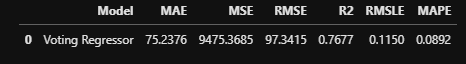

`석식`

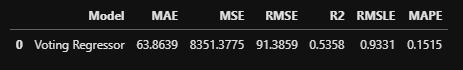

---
- 0711 13:59
    
월 매핑 제대로 안돼있었음.. 수정 후 제출! 63.792 `최고기록`

`중식`

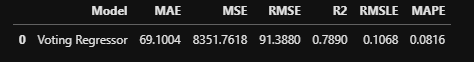

`석식`

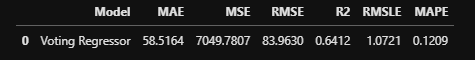


---
- 0711 14:46

연도 매핑 후 연도 추가. 중식은 성능 안좋길래 석식만 넣고 제출 그런데 결과는 68점; 연도 다시 제거!!

`중식`

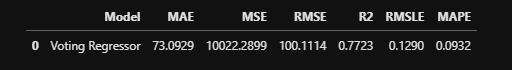

`석식`

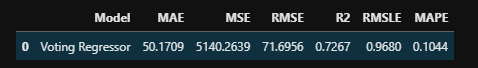

---
- 0711 17:03

일 매핑. 결과 안좋음.. 제거!

---
- 0711 17:26
    
휴가자수 식사가능자수에서 뺐지만 따로 추가해주었음. 파일명 : ensembleVacc.csv

`중식`

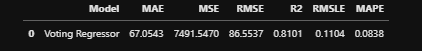

`석식` 

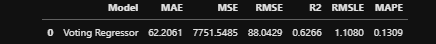

---
- 0711 17:51
    
식사가능자수 <- 식사가능자수/본사정원수로 잠시 변경, 휴가자수도 뺌

`중식`

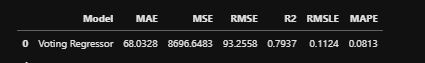

`석식`

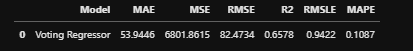

제출결과 안좋음.. 다시 복구

---
- 0712 00:23

휴가자수 임의로 더한걸 뺀다고 생각하고 출장자수를 없앴었음.... 그래서 계속 작게나옴;

이번엔 주, 년을 모두 추가하고 돌려봤다./ 해사꺼 비율시리즈 다 추가했더니 72점나옴.....

`중식`

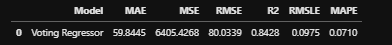

`석식`

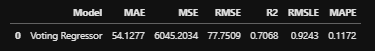

---
- 0712 01:15
    
최고기록에 주 랭크매핑 후 제출. 66.195점.. 낮게나옴



`중식`

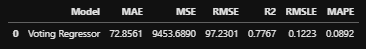

`석식`

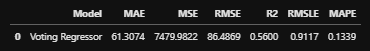

# `Catboost + Kfold제출`

In [200]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

model1 = cat
model2 = cat

model1.fit(x1_train, y1_train) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train) #석식계
pred2 = model2.predict(x2_test)

from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

model1 = cat
models1 = [] # 교차검증을 위한 바구나 5개

for train_idx, val_idx in k_fold.split(x1_train):
    x1_t = x1_train.iloc[train_idx]
    y1_t = y1_train.iloc[train_idx]
    x1_val = x1_train.iloc[val_idx]
    y1_val = y1_train.iloc[val_idx]
    
    models1.append(model1.fit(x1_t, y1_t, eval_set = (x1_val, y1_val), early_stopping_rounds=100, verbose = 100))

preds1 = []
for model1 in models1:
    preds1.append(model1.predict(x1_test))    


model2 = cat
models2 = [] # 교차검증을 위한 바구나 5개

for train_idx, val_idx in k_fold.split(x2_train):
    x2_t = x2_train.iloc[train_idx]
    y2_t = y2_train.iloc[train_idx]
    x2_val = x2_train.iloc[val_idx]
    y2_val = y2_train.iloc[val_idx]
    
    models2.append(model2.fit(x2_t, y2_t, eval_set = (x2_val, y2_val), early_stopping_rounds=100, verbose = 100))
    

preds2 = []
for model2 in models2:
    preds2.append(model2.predict(x2_test))
    
pred1 = np.mean(preds1, axis=0)
pred2 = np.mean(preds2, axis=0)

submission['중식계'] = pred1
submission['석식계'] = pred2

submission.to_csv('catKfold+pca.csv', index=False)

Learning rate set to 0.040347
0:	learn: 203.8039608	total: 1.68ms	remaining: 1.68s
1:	learn: 198.6690684	total: 3.19ms	remaining: 1.59s
2:	learn: 193.6941285	total: 4.91ms	remaining: 1.63s
3:	learn: 188.8623510	total: 6.28ms	remaining: 1.56s
4:	learn: 184.5040965	total: 7.48ms	remaining: 1.49s
5:	learn: 179.9805294	total: 8.55ms	remaining: 1.42s
6:	learn: 175.6745562	total: 9.81ms	remaining: 1.39s
7:	learn: 171.7829801	total: 11ms	remaining: 1.36s
8:	learn: 168.1176748	total: 12.1ms	remaining: 1.33s
9:	learn: 164.2453374	total: 13.2ms	remaining: 1.31s
10:	learn: 160.7548979	total: 14.2ms	remaining: 1.28s
11:	learn: 157.2662454	total: 15.3ms	remaining: 1.26s
12:	learn: 154.1019452	total: 16.5ms	remaining: 1.25s
13:	learn: 151.0060121	total: 17.6ms	remaining: 1.24s
14:	learn: 148.0657716	total: 18.7ms	remaining: 1.23s
15:	learn: 145.3339587	total: 19.9ms	remaining: 1.23s
16:	learn: 142.6975252	total: 21.1ms	remaining: 1.22s
17:	learn: 140.1276672	total: 22.3ms	remaining: 1.21s
18:	learn:

# `Catboost 만 `

In [172]:
model1 = cat
model2 = cat

model1.fit(x1_train, y1_train) #중식계
pred1 = model1.predict(x1_test)

model2.fit(x2_train, y2_train) #석식계
pred2 = model2.predict(x2_test)

submission['중식계'] = pred1
submission['석식계'] = pred2

submission.to_csv('cat_2.csv', index=False)

Learning rate set to 0.040347
0:	learn: 203.8222061	total: 10.4ms	remaining: 10.4s
1:	learn: 198.9518522	total: 11.8ms	remaining: 5.88s
2:	learn: 194.0429414	total: 14.1ms	remaining: 4.7s
3:	learn: 189.5921109	total: 15.5ms	remaining: 3.85s
4:	learn: 185.4361790	total: 17.6ms	remaining: 3.5s
5:	learn: 181.2186068	total: 19.1ms	remaining: 3.17s
6:	learn: 177.1830940	total: 20.5ms	remaining: 2.9s
7:	learn: 173.2770375	total: 23.7ms	remaining: 2.93s
8:	learn: 169.5090534	total: 25.9ms	remaining: 2.85s
9:	learn: 166.0263954	total: 29.3ms	remaining: 2.9s
10:	learn: 162.4703780	total: 30.7ms	remaining: 2.76s
11:	learn: 159.2346394	total: 32ms	remaining: 2.64s
12:	learn: 156.3678064	total: 33.3ms	remaining: 2.53s
13:	learn: 153.8988440	total: 35.4ms	remaining: 2.49s
14:	learn: 151.0320693	total: 37.6ms	remaining: 2.47s
15:	learn: 148.3434688	total: 39.1ms	remaining: 2.4s
16:	learn: 145.9473443	total: 40.6ms	remaining: 2.35s
17:	learn: 143.7077922	total: 41.9ms	remaining: 2.28s
18:	learn: 141.

# PCA

In [35]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '요일(석식)', '년', '월',
       '일', '주', '휴가비율', '출장비율', '재택비율', '월(중식)', '월(석식)', '주(중식)', '주(석식)',
       '식사가능자수', '공휴일전후_0', '공휴일전후_1', '공휴일전후_2'],
      dtype='object')

In [29]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [96]:
train_pca_dn = train.drop(['조식메뉴','중식메뉴','석식메뉴','일자','월(중식)','주(중식)','중식계','월','주','요일'], axis=1) #석식계 pca
train_pca_ln = train.drop(['조식메뉴','중식메뉴','석식메뉴','일자','월(석식)','주(석식)','석식계','월','주','요일(석식)'], axis=1) #중식계

In [33]:
from sklearn.decomposition import PCA

In [97]:
scale_dn = StandardScaler().fit_transform(train_pca_dn)
scale_ln = StandardScaler().fit_transform(train_pca_ln)

In [98]:
pca = PCA(n_components =8)

In [99]:
pca.fit(scale_dn)
train_dn = pca.transform(scale_dn)
print(train_dn.shape)

(1205, 8)


In [100]:
train_pca_dn.석식계

0       331.0
1       560.0
2       573.0
3       525.0
4       330.0
        ...  
1200    421.0
1201    353.0
1202    217.0
1203    502.0
1204    480.0
Name: 석식계, Length: 1205, dtype: float64

In [101]:
pca_columns = ['p_1','p_2','p_3','p_4','p_5','p_6','p_7','p_8'] #p_9','p_10'
trainDF_pca = pd.DataFrame(train_dn,columns=pca_columns)
trainDF_pca['target']= train_pca_dn.석식계

In [102]:
trainDF_pca

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,target
0,-0.655117,-0.071794,2.135400,-0.047998,-0.729934,-0.572668,-0.042229,0.835619,331.0
1,-1.207152,-0.023931,2.371072,0.068515,-0.389397,-0.698371,-0.204156,0.856250,560.0
2,-0.801126,-1.300819,1.580342,0.906439,-0.695655,-0.988647,-0.443065,1.081282,573.0
3,1.300571,-0.670251,2.442480,0.493699,2.909039,3.600124,-2.791567,4.733849,525.0
4,3.280695,-1.405445,3.192014,1.886194,-0.877508,0.735930,2.311094,0.130776,330.0
...,...,...,...,...,...,...,...,...,...
1200,1.196312,1.382347,-2.714414,0.464964,-2.731067,-0.321699,-1.049416,0.605721,421.0
1201,0.640411,2.297263,-2.319882,-0.432647,-1.976971,0.096617,-0.612710,0.096625,353.0
1202,2.029936,0.635760,-2.889824,0.137288,-2.286341,0.013204,-0.663864,0.054596,217.0
1203,0.547889,3.866868,-1.131515,-1.809383,-2.058487,0.495307,-0.721599,-0.161510,502.0


In [103]:
pca.explained_variance_ratio_

array([0.21134839, 0.16087541, 0.14448166, 0.09477727, 0.07534043,
       0.06714201, 0.06165439, 0.06110955])

In [104]:
sum(pca.explained_variance_ratio_)

0.87672910045837

In [105]:
train_pca_ln.corr()['중식계'].sort_values()

요일               -0.734273
본사출장자수           -0.512680
본사휴가자수           -0.391975
주(중식)            -0.285160
월(중식)            -0.218376
공휴일전후_3          -0.174600
공휴일전후_1          -0.118765
공휴일전후_2          -0.117056
본사정원수            -0.115529
일                -0.097392
년                -0.078804
현본사소속재택근무자수       0.076509
식사가능자수            0.151029
공휴일전후_0           0.249245
본사시간외근무명령서승인건수    0.535611
중식계               1.000000
Name: 중식계, dtype: float64

In [106]:
train_pca_dn.corr()['석식계'].sort_values()

요일(석식)           -0.472469
주(석식)            -0.356084
본사휴가자수           -0.316894
월(석식)            -0.245495
년                -0.194792
본사출장자수           -0.188164
일                -0.185565
본사정원수            -0.173852
공휴일전후_1          -0.153929
공휴일전후_3          -0.122286
공휴일전후_2          -0.076105
현본사소속재택근무자수      -0.057534
식사가능자수            0.118615
공휴일전후_0           0.218995
본사시간외근무명령서승인건수    0.571168
석식계               1.000000
Name: 석식계, dtype: float64

<AxesSubplot:>

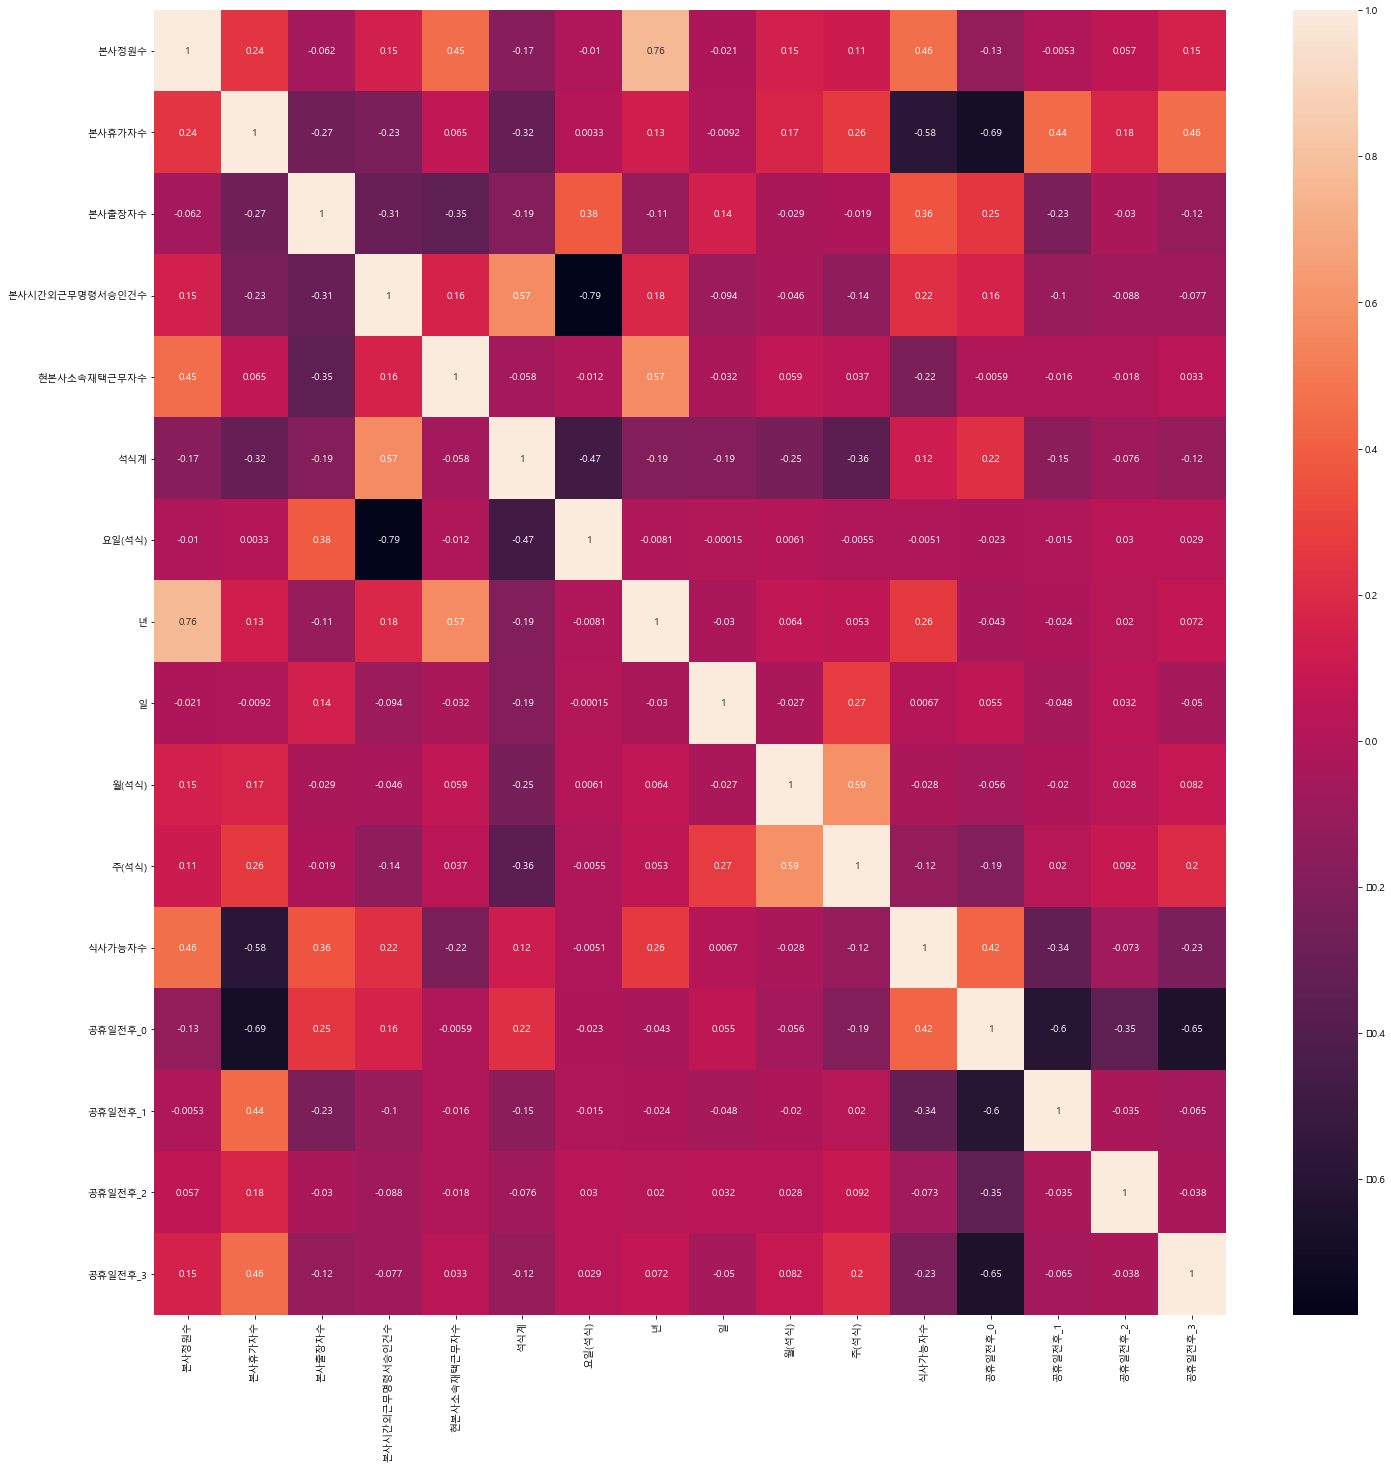

In [107]:
corr = train_pca_dn.corr()
plt.figure(figsize=(24,24))
sns.heatmap(corr, annot=True)

In [108]:
pca_ln = PCA(n_components =8)

In [109]:
pca_ln.fit(scale_ln)
train_ln = pca_ln.transform(scale_ln)
print(train_ln.shape)

(1205, 8)


In [110]:
train_pca_ln.중식계

0       1039.0
1        867.0
2       1017.0
3        978.0
4        925.0
         ...  
1200    1093.0
1201     832.0
1202     579.0
1203    1145.0
1204    1015.0
Name: 중식계, Length: 1205, dtype: float64

In [111]:
pca_columns = ['p_1','p_2','p_3','p_4','p_5','p_6','p_7','p_8'] #'p_8','p_9','p_10'
trainDF_pca_ln = pd.DataFrame(train_ln,columns=pca_columns)
trainDF_pca_ln['target']= train_pca_ln.중식계

In [112]:
trainDF_pca_ln

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,target
0,-1.892578,0.771452,2.858817,1.009317,0.002573,-1.183381,-1.001118,0.523086,1039.0
1,-1.551861,0.096965,2.343220,1.207763,-0.065179,-1.235235,-0.959632,0.512351,867.0
2,-1.402419,-0.313125,2.313665,1.495749,-0.229425,-1.198782,-1.103740,0.462746,1017.0
3,0.949808,-0.067491,2.279213,2.471614,4.749394,1.798913,-3.726671,3.517031,978.0
4,2.472184,0.294757,3.654543,3.565703,0.300821,-1.518574,1.669533,0.587212,925.0
...,...,...,...,...,...,...,...,...,...
1200,-0.598413,2.230924,-1.657344,1.801279,-2.005043,1.161846,-0.775595,-0.090392,1093.0
1201,-0.494295,1.722463,-2.257432,1.649757,-1.654218,0.934955,-0.518781,-0.156083,832.0
1202,1.206795,0.305019,-2.507126,2.446581,-2.040329,1.000141,-0.529685,-0.231246,579.0
1203,-1.657298,3.953880,-0.832407,0.994695,-1.156155,1.541164,-0.366269,-0.656815,1145.0


In [113]:
pca_ln.explained_variance_ratio_

array([0.22039536, 0.16941733, 0.14085849, 0.09823839, 0.06997473,
       0.06511472, 0.06114812, 0.05862671])

In [114]:
sum(pca_ln.explained_variance_ratio_)

0.8837738444088941

<AxesSubplot:>

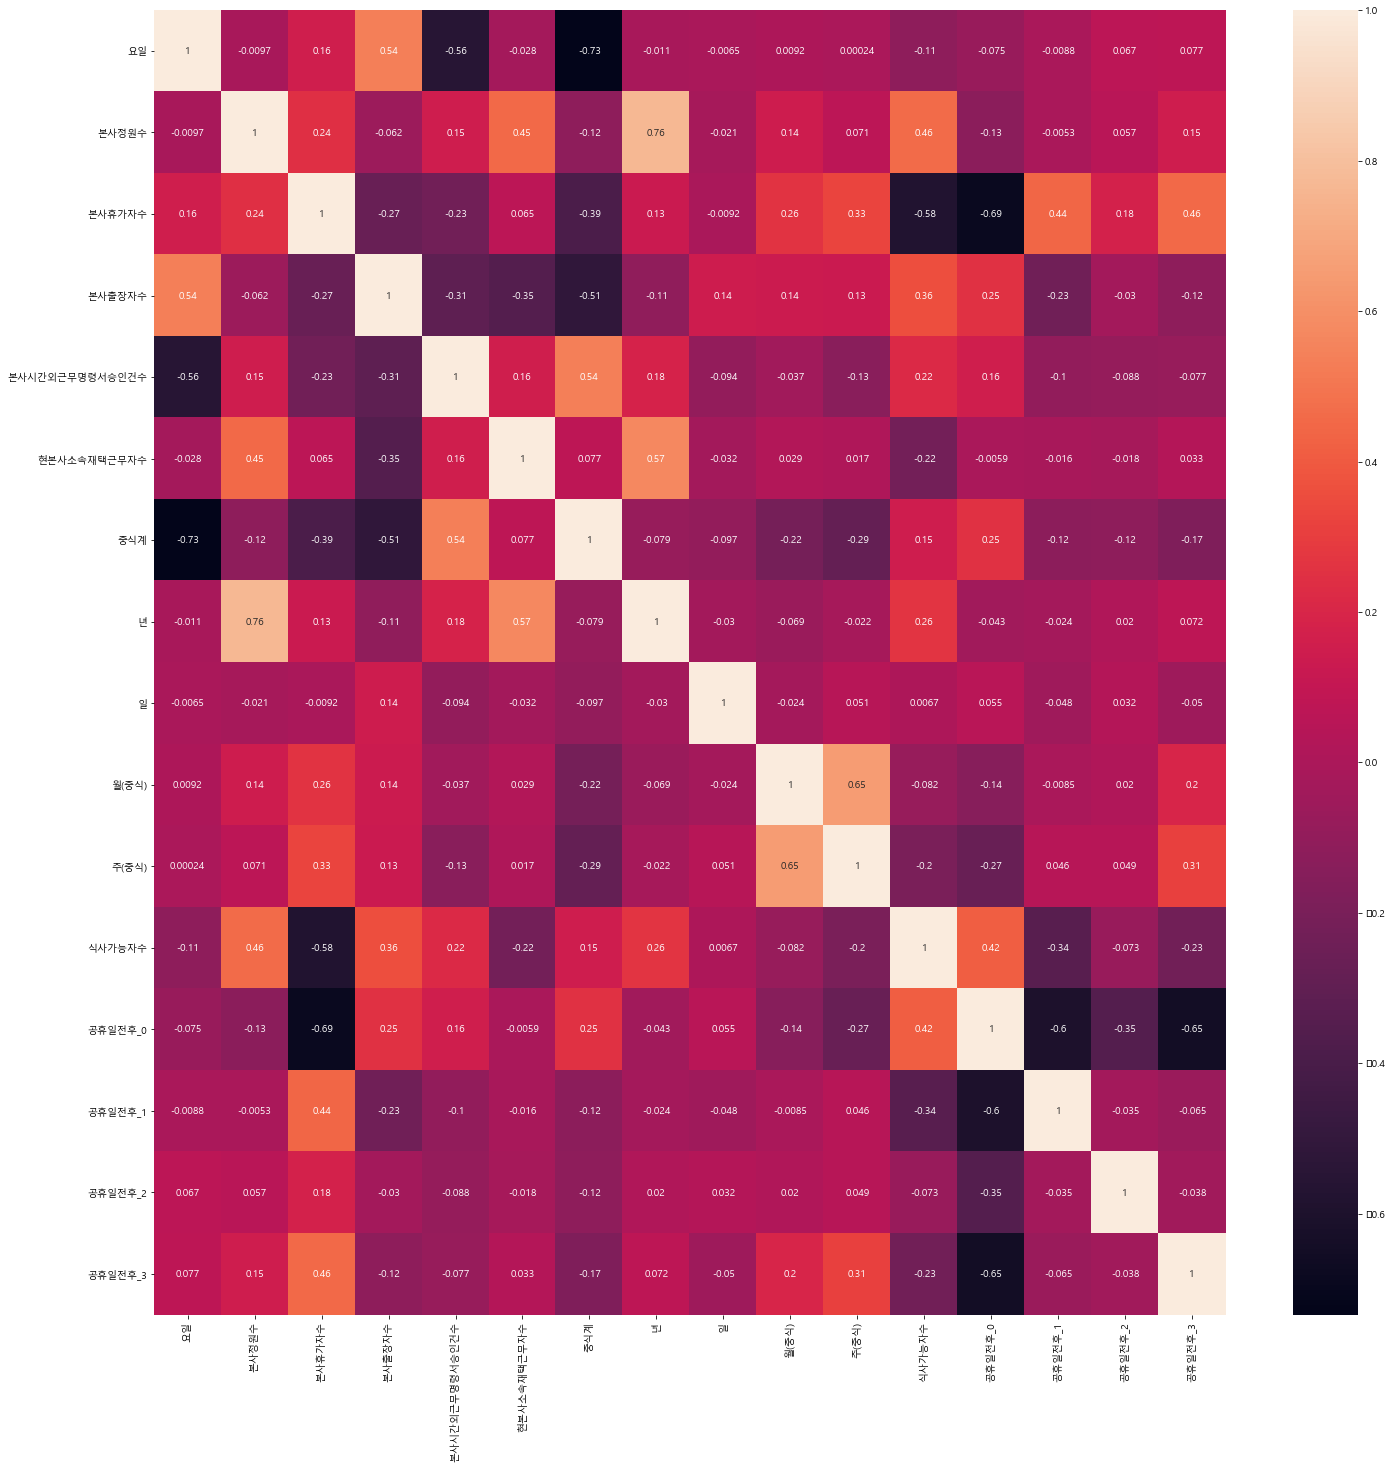

In [115]:
corr = train_pca_ln.corr()
plt.figure(figsize=(24,24))
sns.heatmap(corr, annot=True)